<a href="https://colab.research.google.com/github/Naveenkumar-n7/Naveenkumar/blob/main/gold%20price%20prediction%20using%20machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Step 1 - Data collection and processing


In [7]:
gd=pd.read_csv('/content/gld_price_data.csv')

In [8]:
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
gd.tail()                    # tail is to see the last 5 value in dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# to see number of column and rows
gd.shape

(2290, 6)

In [11]:
# to see additional information of data
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
# have to check if any missing value is there
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# to see statistical values
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation-Correlation describes the relationship between variables. It can be described as either strong or weak, and as either positive or negative.

Types

1) positive correlation-positive correlation when the variable on the
x
-axis increases as the variable on the
y
-axis increases.

2)Negative correlation-negative correlation when one variable increases as the other variable decreases.

#Building heat map to understandd the correlation

In [14]:
gd=gd.drop(['Date'],axis=1)

In [15]:
correlation=gd.corr()

<Axes: >

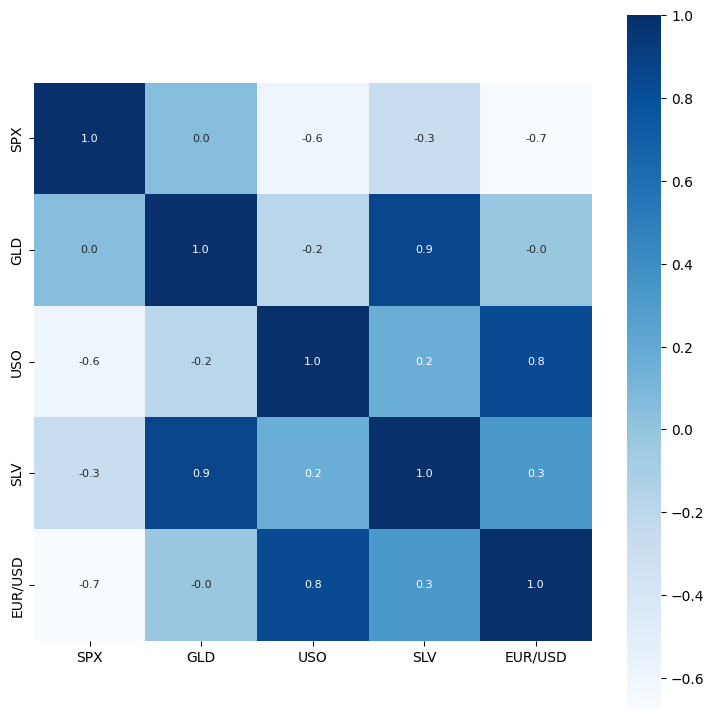

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [17]:
#correaltion value
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-30ab3ef50970>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gd['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

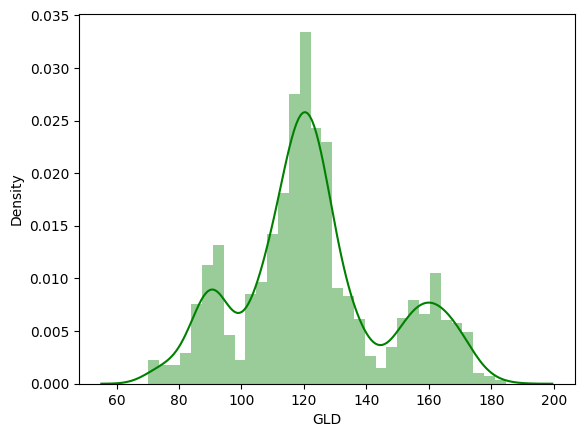

In [18]:
sns.distplot(gd['GLD'],color='green')

In [19]:
a=gd.drop(['GLD'],axis=1)
b=gd['GLD']

In [20]:
print(a)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(b)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting the training data and test data

In [22]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=2)

training model=random forest regressor

In [23]:
regg=RandomForestRegressor(n_estimators=100)

In [24]:
regg.fit(a_train,b_train)

RandomForestRegressor()

In [25]:
test_data_on_prediction=regg.predict(a_test)

In [26]:
print(test_data_on_prediction)

[168.59539951  81.97329986 116.21740025 127.69510083 120.69700116
 154.86649766 150.29869812 126.19470048 117.4543988  126.13520023
 116.66780098 171.45530135 141.46569819 167.71829761 115.11360018
 117.67680039 136.9751033  170.21980136 158.94760207 159.54709919
 155.10260019 125.07840013 175.83929894 156.71010363 125.21980052
  93.8906995   77.36230001 120.62530005 119.16169948 167.3988995
  88.09040054 125.24710024  91.17040072 117.61770055 121.24209927
 136.8423008  115.49400104 115.11640072 147.04759965 107.23130105
 103.79740221  87.25179796 126.56170058 117.92209965 155.12339891
 119.44999995 108.4304003  108.12459812  93.22950102 127.0934983
  75.13790012 113.66529936 121.44670004 111.27129912 118.7704989
 120.64239965 160.46130013 168.58890121 146.90879683  85.62889859
  94.29100027  86.98189971  90.54730026 118.88240067 126.40410053
 127.43810023 170.08689938 122.18799933 117.44239906  98.14620022
 167.28190175 143.76689867 131.91880292 121.23650246 121.26299951
 119.66140073

In [27]:
error_score=metrics.r2_score(b_test,test_data_on_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895397402860147


In [29]:
b_test=list(b_test)

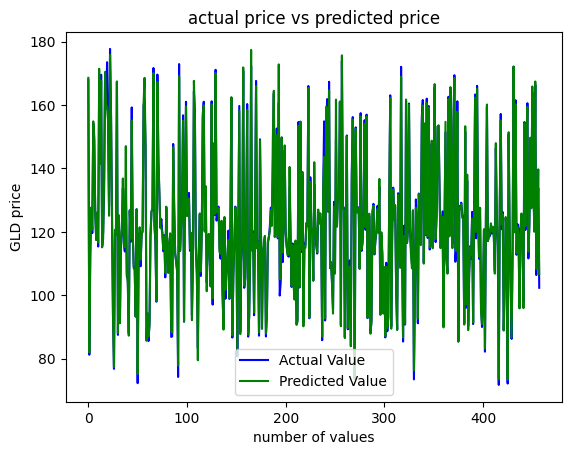

In [30]:
plt.plot(b_test,color='blue',label='Actual Value')
plt.plot(test_data_on_prediction,color='green',label='Predicted Value')
plt.title('actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()